In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from IPython.display import Image

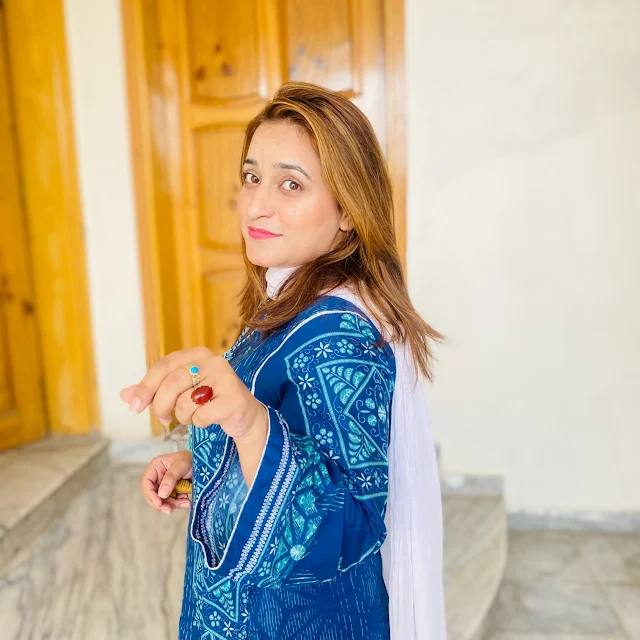

In [3]:
#original image 
img_bgr = cv.imread("unnamed.jpeg", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
Image(filename="./unnamed.jpeg")

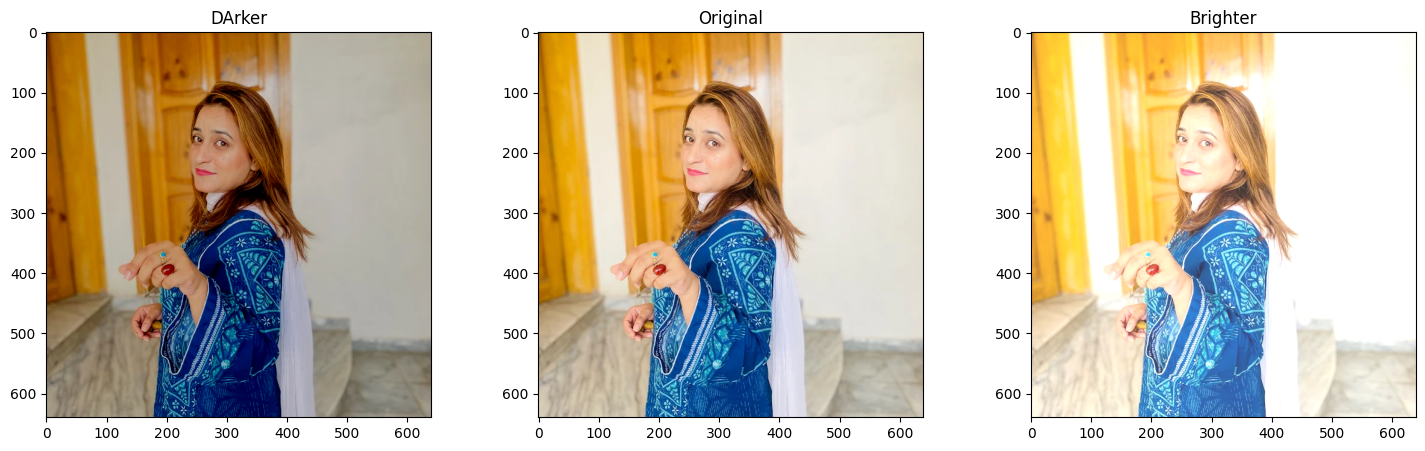

In [6]:
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv.add(img_rgb, matrix)
img_rgb_darker = cv.subtract(img_rgb, matrix)

#show i,agess
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("DArker");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Brighter");

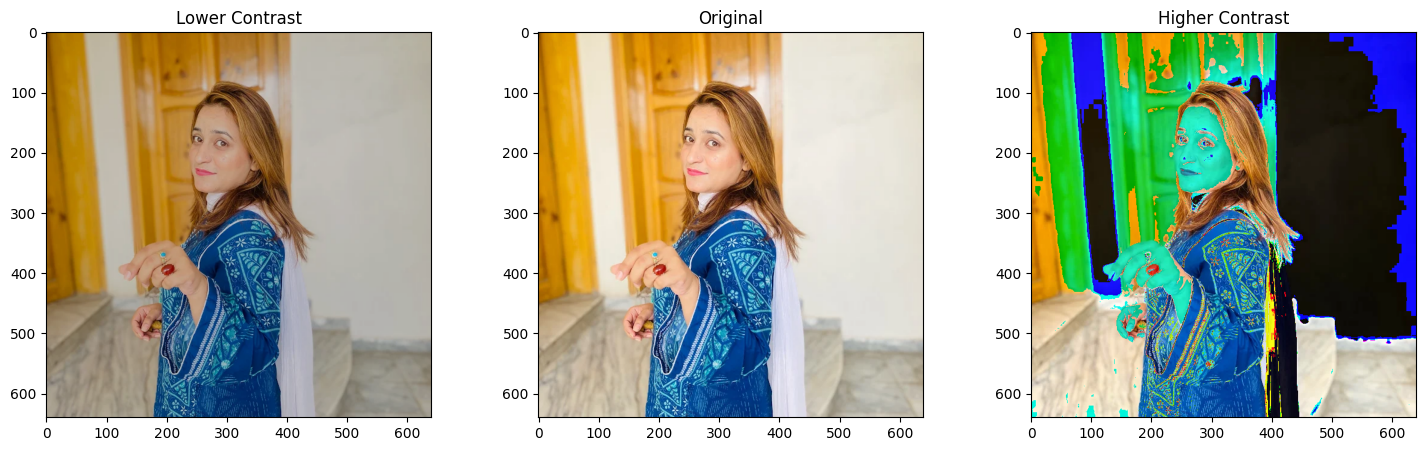

In [11]:
# multiplication and contrast

matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2


img_rgb_lower = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(cv.multiply(np.float64(img_rgb), matrix2))

#show i,agess
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher); plt.title("Higher Contrast");

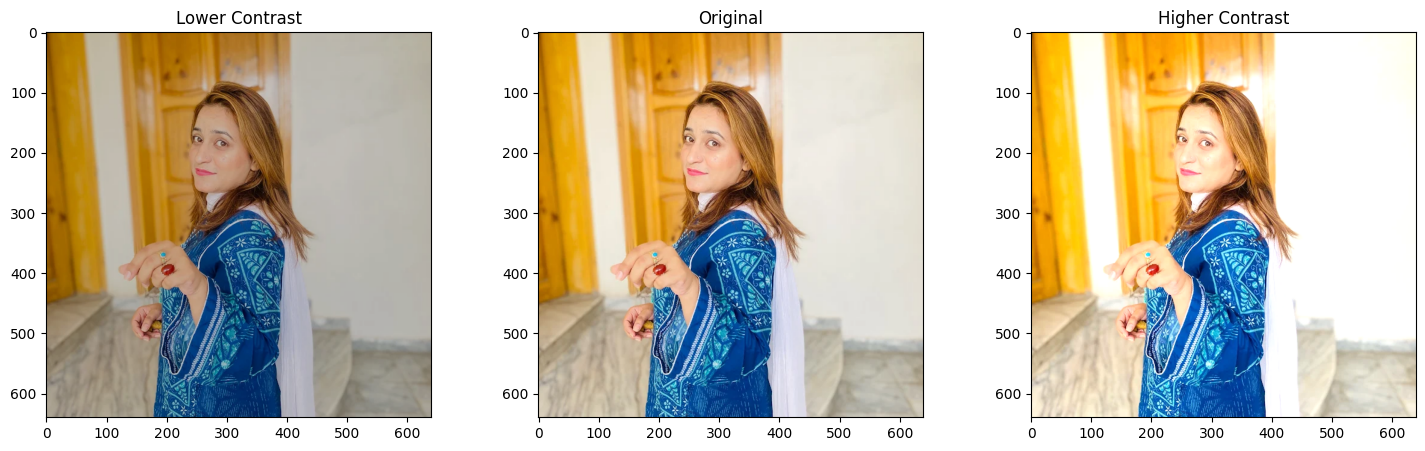

In [14]:
# multiplication and contrast Clipping higher values 

matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2


img_rgb_lower = np.uint8(cv.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv.multiply(np.float64(img_rgb), matrix2),0,255))

#show i,agess
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher); plt.title("Higher Contrast");

In [20]:
#image Thresholding

img_read = cv.imread("./unnamed.jpeg", cv.IMREAD_GRAYSCALE)

retval, img_thresh = cv.threshold(img_read, 100, 255, cv.THRESH_BINARY)

(640, 640)
100.0


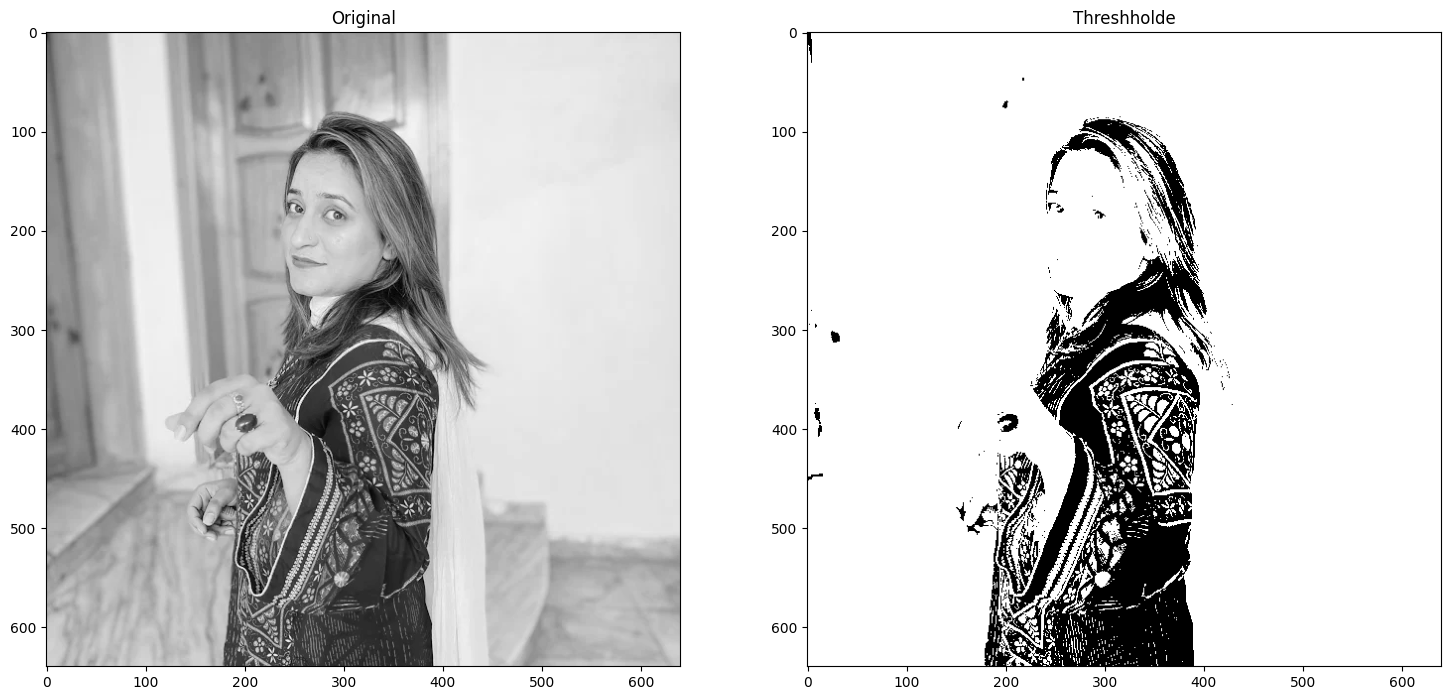

In [22]:
#Show the images 
plt.figure(figsize=[18,10])

plt.subplot(121); plt.imshow(img_read, cmap="gray"); plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray"); plt.title("Threshholde");
print(img_thresh.shape)
print(retval)

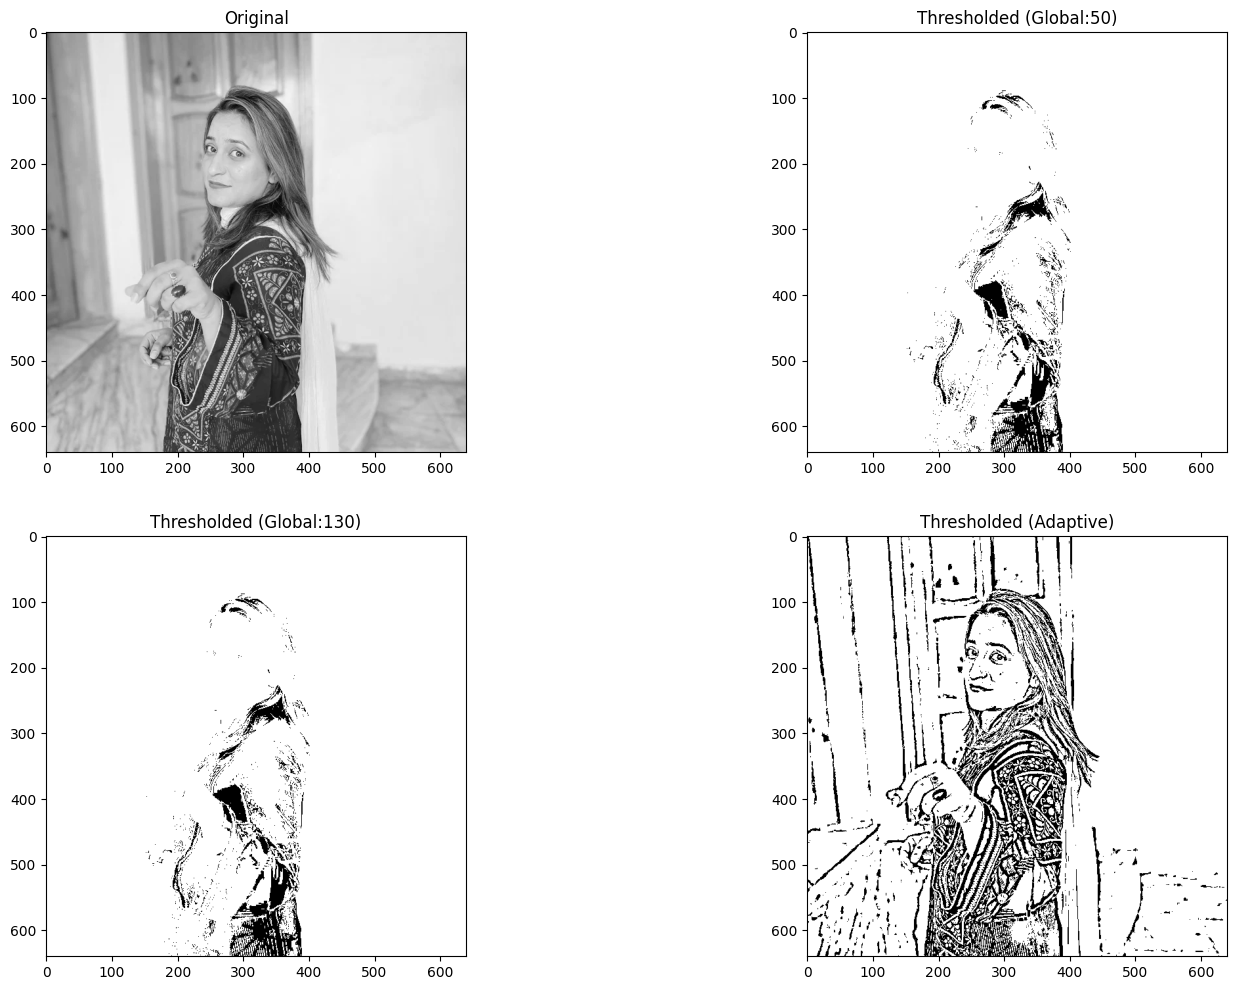

In [31]:
img_read = cv.imread("./unnamed.jpeg", cv.IMREAD_GRAYSCALE)


retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,12])
plt.subplot(221); plt.imshow(img_read, cmap="gray"); plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap="gray"); plt.title("Thresholded (Global:50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_1, cmap="gray"); plt.title("Thresholded (Global:130)");
plt.subplot(224); plt.imshow(img_thresh_adp, cmap="gray"); plt.title("Thresholded (Adaptive)");

(640, 640)


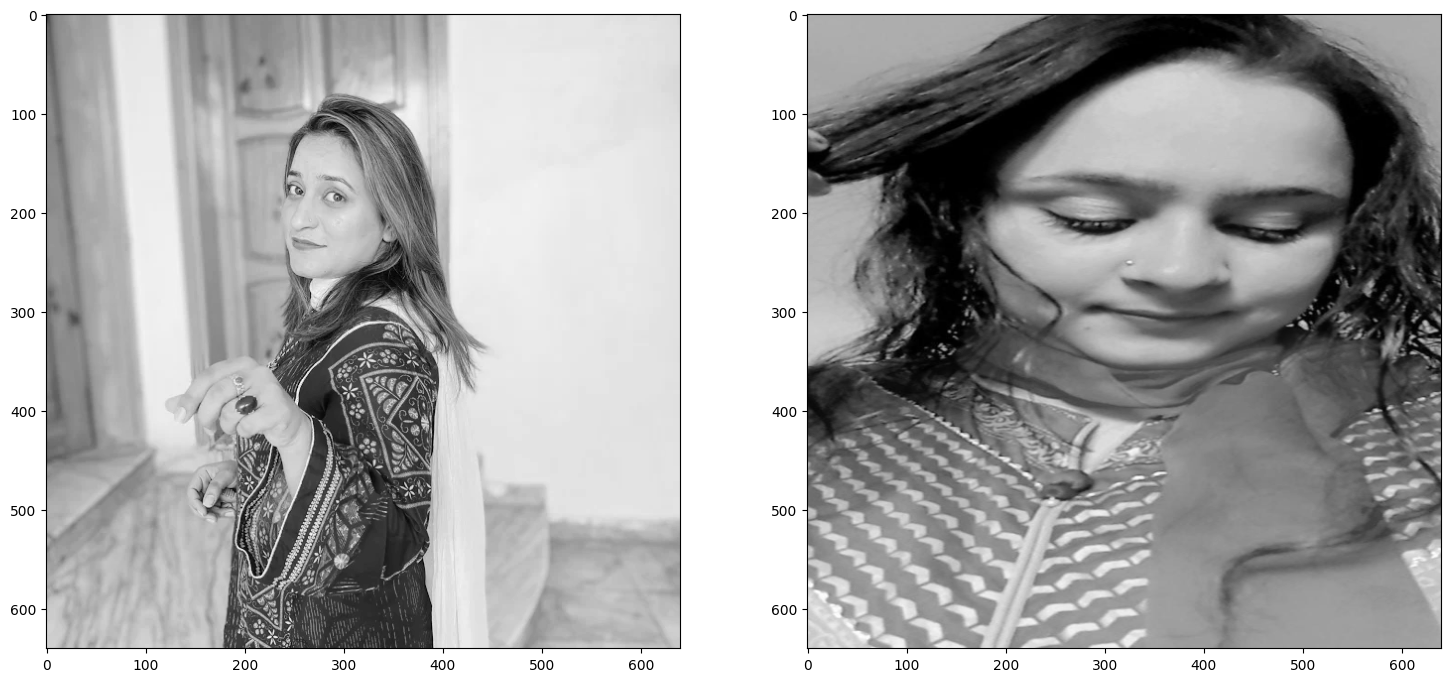

In [39]:
img_rec = cv.imread("./unnamed.jpeg", cv.IMREAD_GRAYSCALE)

img_cir = cv.imread("./sam.jpeg", cv.IMREAD_GRAYSCALE)
img_cir = cv.resize(img_cir, img_rec.shape)
plt.figure(figsize=[18,10])

plt.subplot(121); plt.imshow(img_rec, cmap="gray")
plt.subplot(122); plt.imshow(img_cir, cmap="gray")

print(img_rec.shape)

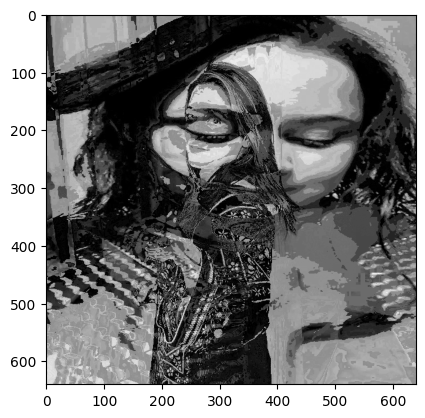

In [40]:
#bitwise and Operator

result = cv.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

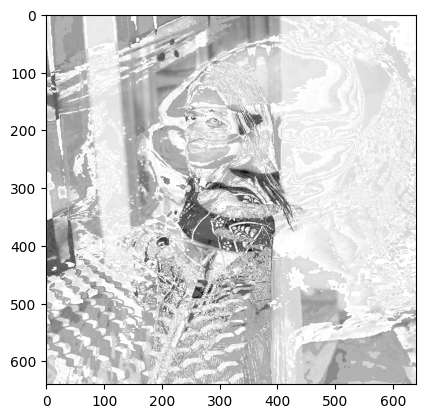

In [42]:
result = cv.bitwise_or(img_cir, img_rec, mask=None)
plt.imshow(result, cmap="gray")

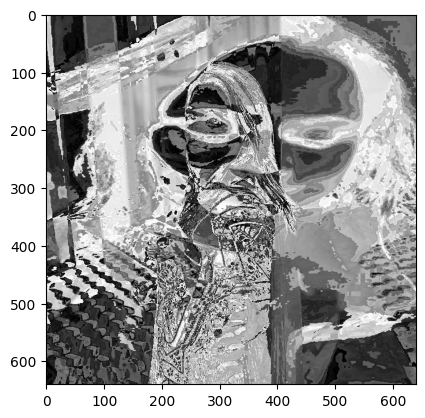

In [43]:
result = cv.bitwise_xor(img_cir, img_rec, mask=None)
plt.imshow(result, cmap="gray")

121
208


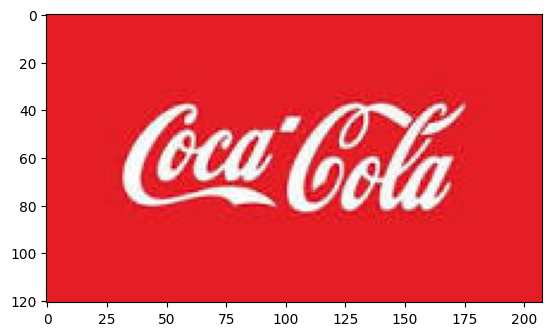

In [50]:
img_bgr = cv.imread("./cola.jpeg")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape[0])
print(img_rgb.shape[1])

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(121, 208, 3)


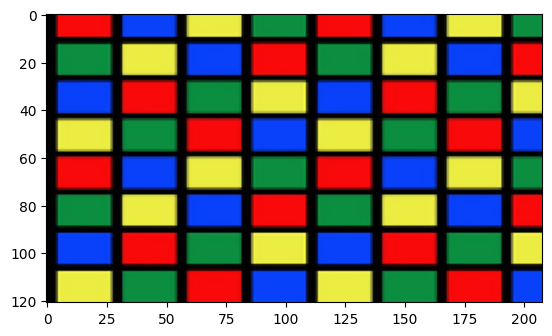

In [53]:
bk_bgr = cv.imread("./p.jpg")
bk_rgb = cv.cvtColor(bk_bgr, cv.COLOR_BGR2RGB)
bk_rgb = cv.resize(bk_rgb, (img_rgb.shape[1], img_rgb.shape[0]))

aspect_ratio = logo_w / bk_rgb.shape[1]
dim = (logo_w, int(bk_rgb.shape[1]*aspect_ratio))

# bk_rgb_n = cv.resize(bk_rgb, dim, interpolation=cv.INTER_AREA)

plt.imshow(bk_rgb)
print(bk_rgb.shape)

(121, 208)


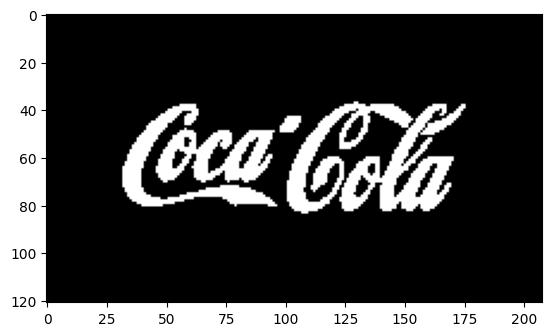

In [54]:
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)


retval, img_masl = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

plt.imshow(img_masl, cmap="gray")

print(img_masl.shape)

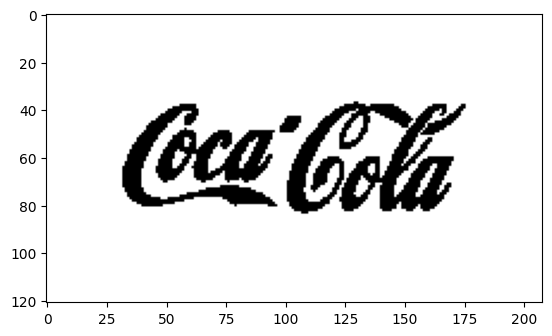

In [55]:
img_mask_inv = cv.bitwise_not(img_masl)

plt.imshow(img_mask_inv, cmap="gray")

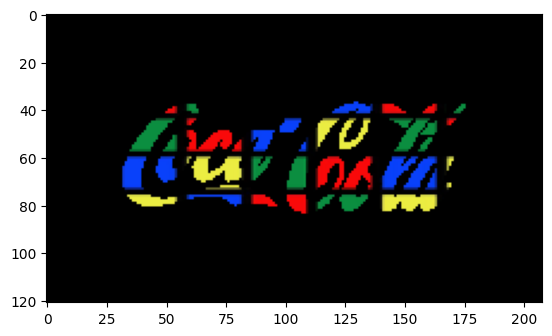

In [56]:
img_bk = cv.bitwise_and(bk_rgb, bk_rgb, mask= img_masl)
plt.imshow(img_bk)

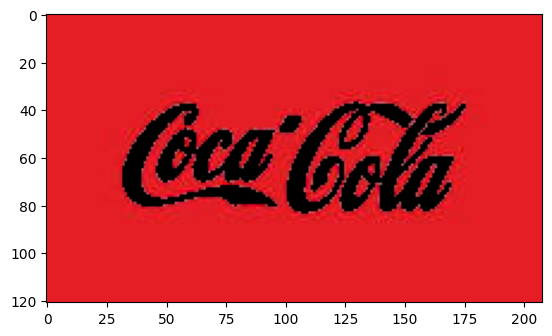

In [57]:
img_foreground =  cv.bitwise_and(img_rgb, img_rgb, mask = img_mask_inv)

plt.imshow(img_foreground)

True

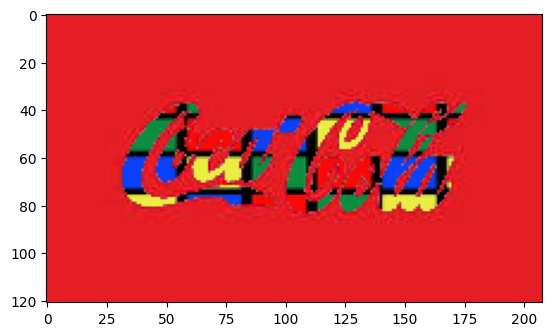

In [58]:
result = cv.add(img_bk, img_foreground)
plt.imshow(result)
cv.imwrite("logo_final.png", result[:,:,::-1])